# 빅뱅이론

### 1. Title
### 2. Day
### 3. Rating

In [ ]:
# from selenium import webdriver
# from selenium.webdriver.chrome.options import Options
# from selenium.webdriver.chrome.service import Service
# from webdriver_manager.chrome import ChromeDriverManager
# import re

# #윈도우에서 열때
# options = Options()
# options.add_experimental_option('detach', True)  # 브라우저 바로 닫힘 방지
# options.add_experimental_option('excludeSwitches', ['enable-logging'])  # 불필요한 메시지 제거

# service = Service(ChromeDriverManager().install())

# driver = webdriver.Chrome(service=service, options=options)

# driver.get('https://www.imdb.com/title/tt0898266/episodes/?ref_=tt_eps_sm')


In [1]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from bs4 import BeautifulSoup
import time
from tqdm import tqdm 
import re

#리눅스 환경

url = "https://www.imdb.com/title/tt0898266/episodes/?ref_=tt_eps_sm"
driver = webdriver.Chrome(service=Service("/home/addinedu/dev_ws/driver/chromedriver-linux64/chromedriver"))

 

   

driver. get(url)

In [ ]:
# all_box = driver.find_element(By.CLASS_NAME, "ipc-page-section ipc-page-section--base ipc-page-section--sp-pageMargin")
# # page_move = all_box.find_element(By.CLASS_NAME, 'ipc-tabs ipc-tabs--base ipc-tabs--align-left ipc-tabs--display-chip ipc-tabs--inherit')
# # move_on = page_move.find_elements(By.CLASS_NAME, 'ipc-tab ipc-tab-link ipc-tab--on-base')

#### 페이지 이동준비
1. 가장 큰 범주의 박스로 이동
2. 페이지 이동하는 박스로 이동
3. 각 페이지의 class 모두 불러오기

In [2]:
req = driver.page_source
soup = BeautifulSoup(req,'html.parser')  
all_box = soup.find(class_= "ipc-page-section ipc-page-section--base ipc-page-section--sp-pageMargin")
page_move = all_box.find(class_= 'ipc-tabs ipc-tabs--base ipc-tabs--align-left ipc-tabs--display-chip ipc-tabs--inherit')
move_on = page_move.find_all(class_= 'ipc-tab ipc-tab-link ipc-tab--on-base')

#### 총 페이지 개수 확인

In [3]:
len(move_on)

12

In [ ]:
# //*[@id="__next"]/main/div/section/div/section/div/div[1]/section[2]/section[1]/div[2]/ul/a[1]
# //*[@id="__next"]/main/div/section/div/section/div/div[1]/section[2]/section[1]/div[2]/ul/a[2]


##### 페이지 이동이 잘 되는지 확인해보기

In [ ]:
# for i in range(len(move_on)):
#     page_2dong = driver.find_element(By.XPATH, f'//*[@id="__next"]/main/div/section/div/section/div/div[1]/section[2]/section[1]/div[2]/ul/a[{i+1}]')
#     # driver.execute_script("arguments[0].scrollIntoView(true);", page_2dong)
#     try:
#         page_2dong.click()
#     except:
#         print("z")

#     time.sleep(2)

#### 현재 페이지에서 내가 원하는 정보가 있는 위치 찾기

In [4]:

req = driver.page_source
soup = BeautifulSoup(req,'html.parser')  
all_box = soup.find(class_= "ipc-page-section ipc-page-section--base ipc-page-section--sp-pageMargin")
all_inf =all_box.find(class_='sc-7b9ed960-0 jNjsLo')
all_inf_2= all_inf.find_all(class_='sc-282bae8e-1 dSEzwa episode-item-wrapper')

#### 우선 첫페이지의 내가 원하는 내용을 각각의 리스트에 저장하기.

In [5]:

req = driver.page_source
soup = BeautifulSoup(req,'html.parser')  
all_box = soup.find(class_= "ipc-page-section ipc-page-section--base ipc-page-section--sp-pageMargin")
all_inf =all_box.find(class_='sc-7b9ed960-0 jNjsLo')
all_inf_2= all_inf.find_all(class_='sc-282bae8e-1 dSEzwa episode-item-wrapper')

all_inf_list = []
title_list = []
day_list=[]
rating_list=[]

all_inf_list = [i for i in all_inf_2]

for Episode  in all_inf_list:
    title = Episode.find('div', class_="ipc-title__text").get_text()
    title_list.append(title)
    day = Episode.find('span', class_="sc-f2169d65-10 iZXnmI").get_text()
    day_list.append(day)
    rating = Episode.find('span', class_="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating").get_text()
    rating_list.append(rating)
    




In [ ]:
# import re
# ratings_only = [float(re.search(r'(\d+\.\d)', rating).group(1)) for rating in rating_list]

# print(ratings_only)

#### 각각의 리스트 살펴보기

In [6]:
# 제목
title_list 

['S1.E1 ∙ Pilot',
 'S1.E2 ∙ The Big Bran Hypothesis',
 'S1.E3 ∙ The Fuzzy Boots Corollary',
 'S1.E4 ∙ The Luminous Fish Effect',
 'S1.E5 ∙ The Hamburger Postulate',
 'S1.E6 ∙ The Middle Earth Paradigm',
 'S1.E7 ∙ The Dumpling Paradox',
 'S1.E8 ∙ The Grasshopper Experiment',
 'S1.E9 ∙ The Cooper-Hofstadter Polarization',
 'S1.E10 ∙ The Loobenfeld Decay',
 'S1.E11 ∙ The Pancake Batter Anomaly',
 'S1.E12 ∙ The Jerusalem Duality',
 'S1.E13 ∙ The Bat Jar Conjecture',
 'S1.E14 ∙ The Nerdvana Annihilation',
 'S1.E15 ∙ The Pork Chop Indeterminacy',
 'S1.E16 ∙ The Peanut Reaction',
 'S1.E17 ∙ The Tangerine Factor']

In [7]:
# 날짜
day_list

['Mon, Sep 24, 2007',
 'Mon, Oct 1, 2007',
 'Mon, Oct 8, 2007',
 'Mon, Oct 15, 2007',
 'Mon, Oct 22, 2007',
 'Mon, Oct 29, 2007',
 'Mon, Nov 5, 2007',
 'Mon, Nov 12, 2007',
 'Mon, Mar 17, 2008',
 'Mon, Mar 24, 2008',
 'Mon, Mar 31, 2008',
 'Mon, Apr 14, 2008',
 'Mon, Apr 21, 2008',
 'Mon, Apr 28, 2008',
 'Mon, May 5, 2008',
 'Mon, May 12, 2008',
 'Mon, May 19, 2008']

In [8]:
# 평점
rating_list

['8.1/10\xa0(7.1K)',
 '8.2/10\xa0(5.7K)',
 '7.6/10\xa0(5.1K)',
 '8.0/10\xa0(5.2K)',
 '7.9/10\xa0(4.9K)',
 '8.3/10\xa0(5.1K)',
 '8.1/10\xa0(4.9K)',
 '8.2/10\xa0(4.9K)',
 '8.0/10\xa0(4.7K)',
 '8.0/10\xa0(4.8K)',
 '8.2/10\xa0(4.8K)',
 '7.8/10\xa0(4.5K)',
 '8.2/10\xa0(4.7K)',
 '8.0/10\xa0(4.6K)',
 '8.2/10\xa0(4.8K)',
 '8.3/10\xa0(4.6K)',
 '8.5/10\xa0(4.8K)']

In [10]:
# 평점 숫자 부분만 추출
ratings_only = [float(re.search(r'(\d+\.\d)', rating).group(1)) for rating in rating_list]
ratings_only

[8.1,
 8.2,
 7.6,
 8.0,
 7.9,
 8.3,
 8.1,
 8.2,
 8.0,
 8.0,
 8.2,
 7.8,
 8.2,
 8.0,
 8.2,
 8.3,
 8.5]

#### 모든 리스트 합치기

In [11]:

combined_list = list(zip(title_list, day_list, ratings_only))

In [12]:
combined_list

[('S1.E1 ∙ Pilot', 'Mon, Sep 24, 2007', 8.1),
 ('S1.E2 ∙ The Big Bran Hypothesis', 'Mon, Oct 1, 2007', 8.2),
 ('S1.E3 ∙ The Fuzzy Boots Corollary', 'Mon, Oct 8, 2007', 7.6),
 ('S1.E4 ∙ The Luminous Fish Effect', 'Mon, Oct 15, 2007', 8.0),
 ('S1.E5 ∙ The Hamburger Postulate', 'Mon, Oct 22, 2007', 7.9),
 ('S1.E6 ∙ The Middle Earth Paradigm', 'Mon, Oct 29, 2007', 8.3),
 ('S1.E7 ∙ The Dumpling Paradox', 'Mon, Nov 5, 2007', 8.1),
 ('S1.E8 ∙ The Grasshopper Experiment', 'Mon, Nov 12, 2007', 8.2),
 ('S1.E9 ∙ The Cooper-Hofstadter Polarization', 'Mon, Mar 17, 2008', 8.0),
 ('S1.E10 ∙ The Loobenfeld Decay', 'Mon, Mar 24, 2008', 8.0),
 ('S1.E11 ∙ The Pancake Batter Anomaly', 'Mon, Mar 31, 2008', 8.2),
 ('S1.E12 ∙ The Jerusalem Duality', 'Mon, Apr 14, 2008', 7.8),
 ('S1.E13 ∙ The Bat Jar Conjecture', 'Mon, Apr 21, 2008', 8.2),
 ('S1.E14 ∙ The Nerdvana Annihilation', 'Mon, Apr 28, 2008', 8.0),
 ('S1.E15 ∙ The Pork Chop Indeterminacy', 'Mon, May 5, 2008', 8.2),
 ('S1.E16 ∙ The Peanut Reaction', 'Mo

#### 모든 페이지에 위 과정을 진행해보기

In [7]:
def extract_episode_info(episode):
    title = episode.find('div', class_="ipc-title__text").get_text()
    day = episode.find('span', class_="sc-f2169d65-10 iZXnmI").get_text()
    rating = episode.find('span', class_="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating").get_text()

    rating_value = float(re.search(r'(\d+\.\d)', rating).group(1))

    return title, day, rating_value

def scrape_page(driver, page_number):
    try:
        try:
            page_2dong = driver.find_element(By.XPATH, f'//*[@id="__next"]/main/div/section/div/section/div/div[1]/section[2]/section[1]/div[2]/ul/a[{page_number}]')
            page_2dong.click()
            time.sleep(3)
        except:
            print("no click")
            
        req = driver.page_source
        soup = BeautifulSoup(req, 'html.parser')  
        all_box = soup.find(class_="ipc-page-section ipc-page-section--base ipc-page-section--sp-pageMargin")
        all_inf = all_box.find(class_='sc-7b9ed960-0 jNjsLo')
        all_inf_2 = all_inf.find_all(class_='sc-282bae8e-1 dSEzwa episode-item-wrapper')

        title_list = []
        day_list = []
        rating_list = []

        for episode in all_inf_2:
            title, day, rating_value = extract_episode_info(episode)
            title_list.append(title)
            day_list.append(day)
            rating_list.append(rating_value)

        combined_list = list(zip(title_list, day_list, rating_list))
        return combined_list

    except Exception as e:
        print(f"Error while scraping page {page_number}: {e}")
    return None

#### 실행 및 데이터 결합 

In [8]:
import pandas as pd

if __name__ == "__main__":
    a = len(move_on)  
    all_data = []

    for i in range(a):
        result = scrape_page(driver, i+1)
        if result:
            all_data.extend(result)

    df = pd.DataFrame(all_data, columns=['Title', 'Day', 'Rating'])

    print(df)

no click
                                    Title                Day  Rating
0                           S1.E1 ∙ Pilot  Mon, Sep 24, 2007     8.1
1         S1.E2 ∙ The Big Bran Hypothesis   Mon, Oct 1, 2007     8.2
2       S1.E3 ∙ The Fuzzy Boots Corollary   Mon, Oct 8, 2007     7.6
3        S1.E4 ∙ The Luminous Fish Effect  Mon, Oct 15, 2007     8.0
4         S1.E5 ∙ The Hamburger Postulate  Mon, Oct 22, 2007     7.9
..                                    ...                ...     ...
274  S12.E20 ∙ The Decision Reverberation  Thu, Apr 25, 2019     7.1
275       S12.E21 ∙ The Plagiarism Schism   Thu, May 2, 2019     7.2
276     S12.E22 ∙ The Maternal Conclusion   Thu, May 9, 2019     7.9
277         S12.E23 ∙ The Change Constant  Thu, May 16, 2019     9.0
278      S12.E24 ∙ The Stockholm Syndrome  Thu, May 16, 2019     9.5

[279 rows x 3 columns]


In [ ]:
driver.close()

#### 데이터 저장

In [ ]:
df.to_csv('C:/gg/movie.csv',sep=',',encoding='utf-8')

In [15]:
df

,Title,Day,Rating
0,S2.E1 ∙ The Bad Fish Paradigm,"Mon, Sep 22, 2008",8.2
1,S2.E2 ∙ The Codpiece Topology,"Mon, Sep 29, 2008",8.0
2,S2.E3 ∙ The Barbarian Sublimation,"Mon, Oct 6, 2008",8.7
3,S2.E4 ∙ The Griffin Equivalency,"Mon, Oct 13, 2008",7.9
4,S2.E5 ∙ The Euclid Alternative,"Mon, Oct 20, 2008",8.3
...,...,...,...
257,S12.E20 ∙ The Decision Reverberation,"Thu, Apr 25, 2019",7.1
258,S12.E21 ∙ The Plagiarism Schism,"Thu, May 2, 2019",7.2
259,S12.E22 ∙ The Maternal Conclusion,"Thu, May 9, 2019",7.9
260,S12.E23 ∙ The Change Constant,"Thu, May 16, 2019",9.0


#### 평점 상위 10개 시각화

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

df_sorted = df.sort_values(by='Rating', ascending=False)


df_top10 = df_sorted.head(10)

fig = px.bar(df_top10, x='Rating', y='Title', orientation='h',
             labels={'Rating': 'IMDb Rating', 'Title': 'Movie Title'},
             title='Top 10 IMDb Ratings by Title',
             height=600, width=800)

# Show the plot
fig.show()

#### 평점 하위 10개 시각화

In [11]:
df_sorted = df.sort_values(by='Rating', ascending=False)


df_bottom10 = df_sorted.tail(10)


fig = px.box(df_bottom10, y='Rating', title='IMDb Ratings Distribution (Bottom 10 Titles)',
             labels={'Rating': 'IMDb Rating'})

fig.show()

#### 날짜 순서로 평점 변화 확인

In [12]:
fig = px.line(df, x='Day', y='Rating', title='IMDb Ratings Over Time',
              labels={'Rating': 'IMDb Rating', 'Date': 'Date'})


fig.show()

/home/addinedu/venv/eda_venv/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning:

50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



/home/addinedu/venv/eda_venv/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning:

50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



/home/addinedu/venv/eda_venv/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning:

50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



/home/addinedu/venv/eda_venv/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning:

50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



/home/addinedu/venv/eda_venv/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning:

50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



/home/addinedu/venv/eda_venv/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning:

50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



/home/addinedu/venv/eda_venv/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning:

50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



/home/addinedu/venv/eda_venv/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning:

50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



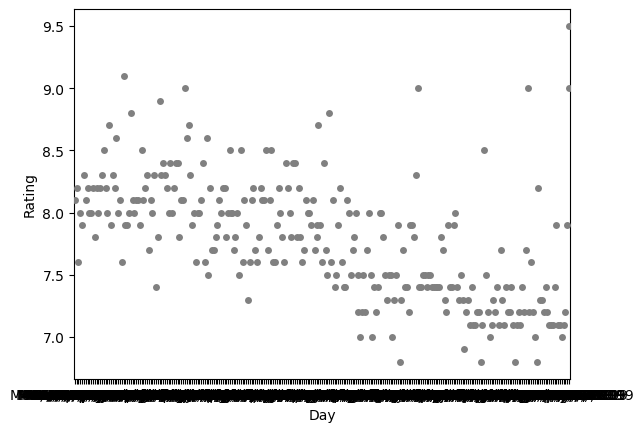

In [13]:
for i in range(a):
    result = scrape_page(driver, i+1)
    if result:
        df = pd.DataFrame(result, columns=['Title', 'Day', 'Rating'])

        
        fig = px.bar(df, x='Title', y='Rating', title=f'IMDb Ratings - Page {i+1}',
                     labels={'Rating': 'IMDb Rating'})
        fig.update_layout(xaxis=dict(tickangle=45, tickmode='array', tickvals=list(df['Title'])))

        # Save the plot as an HTML file (optional)
        fig.write_html(f'imdb_ratings_page_{i+1}.html')

        # Show the plot
        fig.show()
        sns.swarmplot(x="Day", y="Rating", data=df, color=".5")